FPS: 25.0
Target frames per second: 20
Wait time between frames: 50 ms
Original Video resolution 1530 , 2720


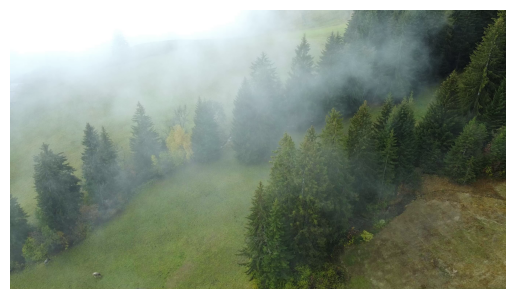

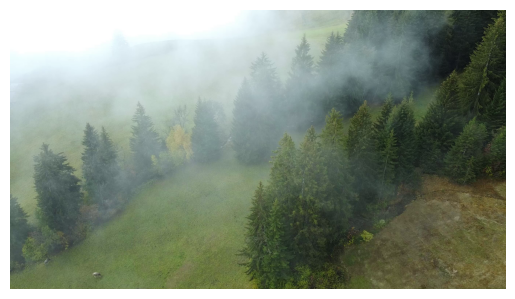

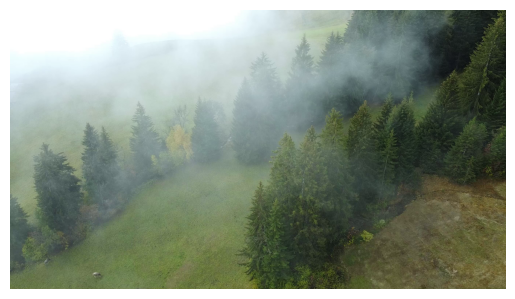

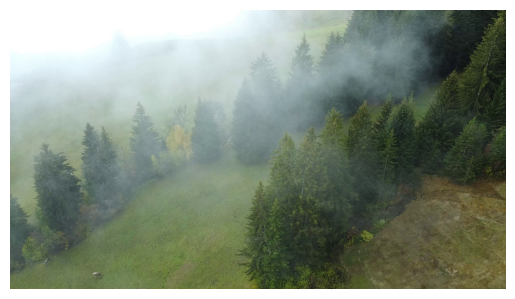

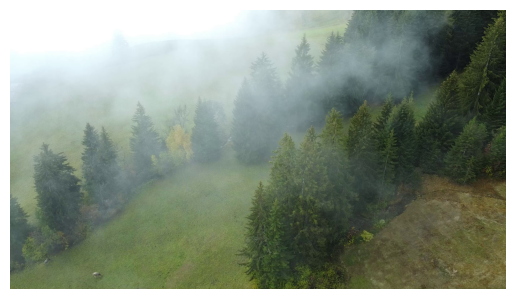

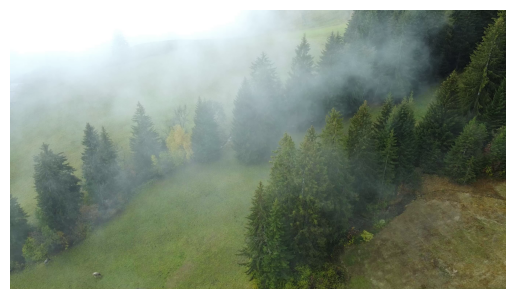

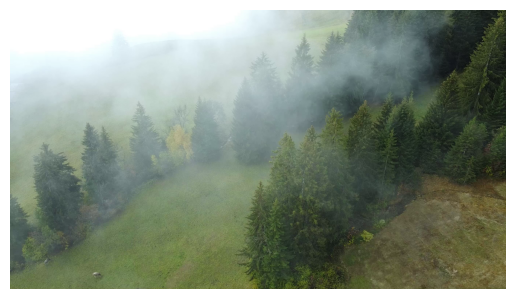

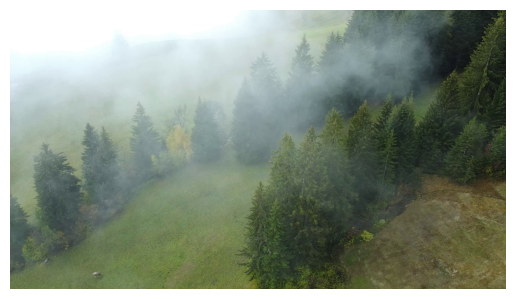

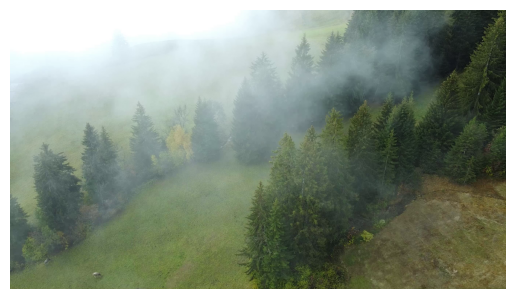

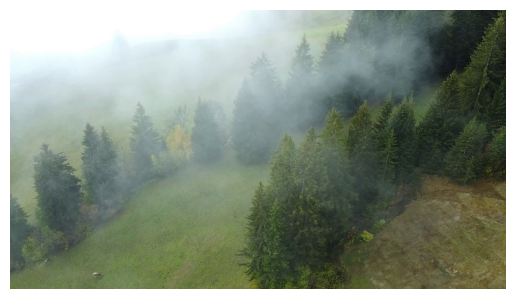

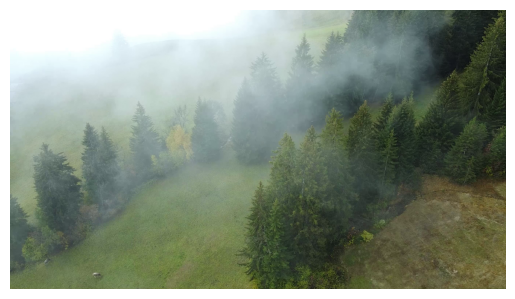

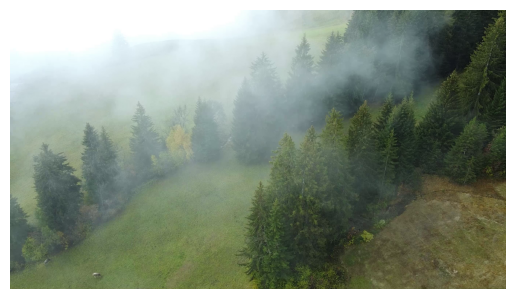

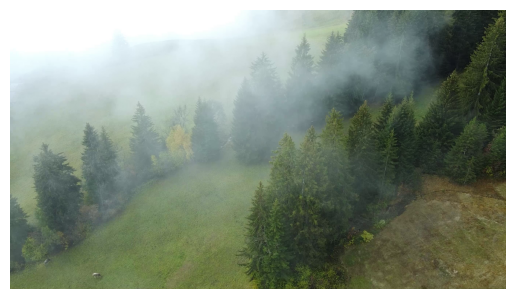

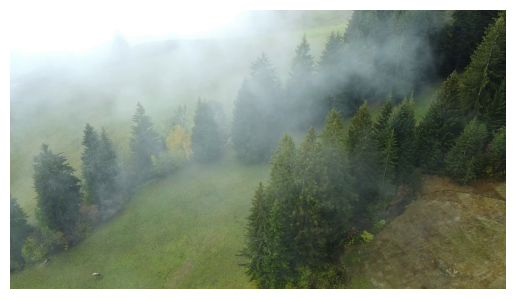

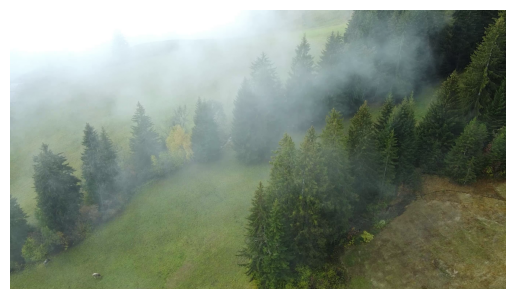

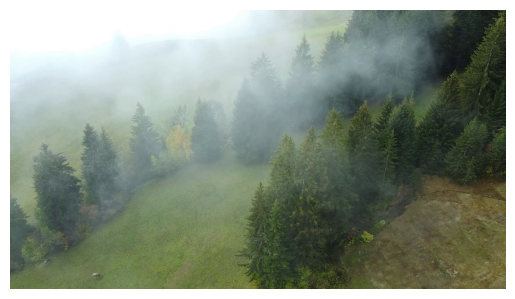

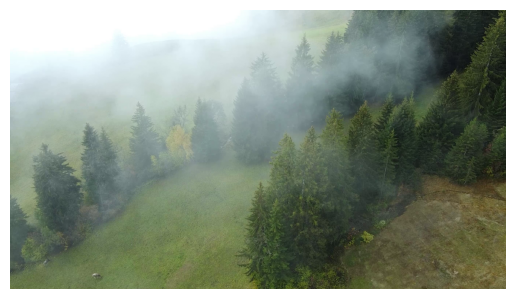

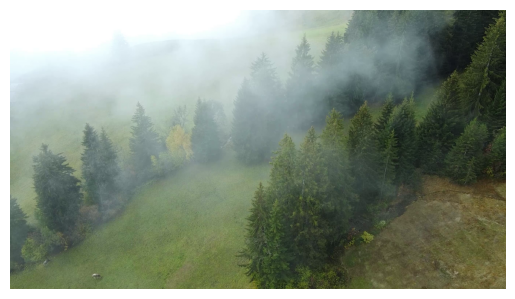

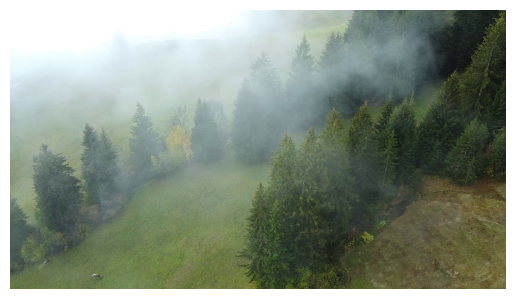

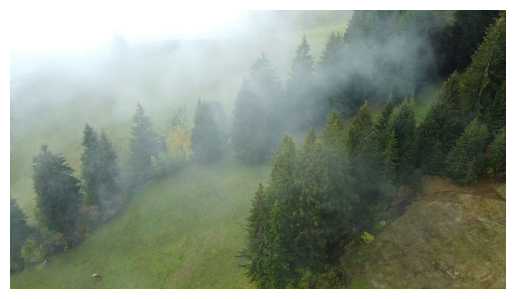

Actual number of frames displayed: 20


In [ ]:
import cv2
import matplotlib.pyplot as plt
import sys

VIDEO_URL = "/content/forest_-_56326 (Original).asc"
cap = cv2.VideoCapture(VIDEO_URL)

if not cap.isOpened():
    print('||| Unable to open URL')
    sys.exit(-1)

fps = cap.get(cv2.CAP_PROP_FPS)
target_frames_per_second = 20  # Specify your desired frame rate here
wait_ms = int(1000 / target_frames_per_second)
print('FPS:', fps)
print('Target frames per second:', target_frames_per_second)
print('Wait time between frames:', wait_ms, 'ms')

frame_count = 0

# Print the video resolution once outside the loop
height, width = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print('Original Video resolution', height, ',', width)

while True:
    success, frame = cap.read()
    if not success or frame is None:
        break

    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis labels
    plt.show()

    if cv2.waitKey(wait_ms) & 0xFF == ord('q'):
        break

    frame_count += 1

    if frame_count == target_frames_per_second:
        break

print('Actual number of frames displayed:', frame_count)

cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
from IPython.display import Image, display

def dark_channel(image, window_size=15):
    min_channel = np.min(image, axis=2)
    return cv2.erode(min_channel, np.ones((window_size, window_size)))

def estimate_atmosphere(image, dark_channel, percentile=0.001):
    flat_dark_channel = dark_channel.flatten()
    flat_image = image.reshape(-1, 3)
    num_pixels = flat_image.shape[0]
    num_pixels_to_keep = int(num_pixels * percentile)
    indices = np.argpartition(flat_dark_channel, -num_pixels_to_keep)[-num_pixels_to_keep:]
    atmosphere = np.max(flat_image[indices], axis=0)
    return atmosphere

def dehaze(image, tmin=0.1, omega=0.95, window_size=15):
    if image is None:
        return None

    image = image.astype(np.float64) / 255.0
    dark_ch = dark_channel(image, window_size)
    atmosphere = estimate_atmosphere(image, dark_ch)
    transmission = 1 - omega * dark_ch

    transmission = np.maximum(transmission, tmin)
    dehazed = np.zeros_like(image)
    for channel in range(3):
        dehazed[:, :, channel] = (image[:, :, channel] - atmosphere[channel]) / transmission + atmosphere[channel]

    dehazed = np.clip(dehazed, 0, 1)

    return (dehazed * 255).astype(np.uint8)

# Path to the video file
video_path = "/content/forest_-_56326 (Original).asc"

# Create a VideoCapture object
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video_path = "/content/dehazed_output.mp4"
output_video = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Loop through each frame, apply desmoking, and write to the output video
while True:
    success, frame = cap.read()
    if not success:
        break

    # Apply desmoking to the frame
    dehazed_frame = dehaze(frame)

    # Write the dehazed frame to the output video
    output_video.write(dehazed_frame)

# Release the video capture and video writer objects
cap.release()
output_video.release()

# Display a link to download the dehazed video
output_video_link = f'<a href="{output_video_path}" target="_blank">Download Dehazed Video</a>'
display(output_video_link)


'<a href="/content/dehazed_output.mp4" target="_blank">Download Dehazed Video</a>'

In [ ]:

print("Frame Width:", frame_width)
print("Frame Height:", frame_height)



Frame Width: 2720
Frame Height: 1530


In [ ]:
import cv2
import numpy as np
from IPython.display import Image, display

def dark_channel(image, window_size=15):
    min_channel = np.min(image, axis=2)
    return cv2.erode(min_channel, np.ones((window_size, window_size)))

def estimate_atmosphere(image, dark_channel, percentile=0.001):
    flat_dark_channel = dark_channel.flatten()
    flat_image = image.reshape(-1, 3)
    num_pixels = flat_image.shape[0]
    num_pixels_to_keep = int(num_pixels * percentile)
    indices = np.argpartition(flat_dark_channel, -num_pixels_to_keep)[-num_pixels_to_keep:]
    atmosphere = np.max(flat_image[indices], axis=0)
    return atmosphere

def dehaze(image, tmin=0.1, omega=0.95, window_size=15):
    if image is None:
        return None

    image = image.astype(np.float64) / 255.0
    dark_ch = dark_channel(image, window_size)
    atmosphere = estimate_atmosphere(image, dark_ch)
    transmission = 1 - omega * dark_ch

    transmission = np.maximum(transmission, tmin)
    dehazed = np.zeros_like(image)
    for channel in range(3):
        dehazed[:, :, channel] = (image[:, :, channel] - atmosphere[channel]) / transmission + atmosphere[channel]

    dehazed = np.clip(dehazed, 0, 1)

    return (dehazed * 255).astype(np.uint8)

# Path to the video file
video_path = "/content/forest_-_56326 (Original).asc"

# Create a VideoCapture object
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
duration = cap.get(cv2.CAP_PROP_FRAME_COUNT) / fps

# Set the desired number of frames
target_frames = int(duration)

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video_path = "/content/dehazed_output777.mp4"
output_video = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Loop through each frame, apply desmoking, and write to the output video
frame_count = 0
while frame_count < target_frames:
    success, frame = cap.read()
    if not success:
        break

    # Apply desmoking to the frame
    dehazed_frame = dehaze(frame)

    # Write the dehazed frame to the output video
    output_video.write(dehazed_frame)

    frame_count += 1

# Release the video capture and video writer objects
cap.release()
output_video.release()

# Display a link to download the dehazed video
output_video_link = f'<a href="{output_video_path}" target="_blank">Download Dehazed Video</a>'
display(output_video_link)

'<a href="/content/dehazed_output777.mp4" target="_blank">Download Dehazed Video</a>'